/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


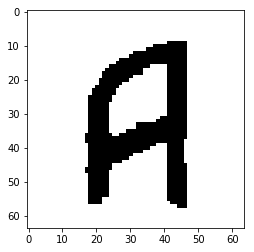

In [5]:
import numpy as np
import scipy
from scipy.misc import imread
import maxflow
from matplotlib import pyplot as plt


img = imread("img/a2.png")

# Create the graph.
g = maxflow.Graph[int]()
# Add the nodes. nodeids has the identifiers of the nodes in the grid.
nodeids = g.add_grid_nodes(img.shape)
# Add non-terminal edges with the same capacity.
g.add_grid_edges(nodeids, 50)
# Add the terminal edges. The image pixels are the capacities
# of the edges from the source node. The inverted image pixels
# are the capacities of the edges to the sink node.
g.add_grid_tedges(nodeids, img, 255-img)


# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)


# The labels should be 1 where sgm is False and 0 otherwise.
img2 = np.int_(np.logical_not(sgm))
# Show the result.

plt.imshow(img2, cmap=plt.cm.gray, interpolation='nearest')
plt.show()